In [2]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils.weather_data_util import get_station_locations, get_location_lists
from utils.weather_data_util import find_nearst_meo_station_name, get_related_meo_dfs
from utils.data_util import load_bj_aq_data

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# 网格气象数据
ld_grid_meo_all = pd.read_csv("./KDD_CUP_2018/London/grid_meo/London_historical_meo_grid.csv")
# 空气质量站点的经纬度
aq_station_locations = pd.read_csv("./KDD_CUP_2018/London/location/London_AirQuality_Stations.csv")

### 1. 站点位置

In [3]:
bj_grid_meo = bj_grid_meo_all.head(651)  # 因为一共只有 651 个 grid

meo_locations = get_station_locations(bj_meo_all)
grid_meo_locations = get_station_locations(bj_grid_meo)
aq_locations = get_station_locations(aq_station_locations)


print("There are %d meo stations in Beijing." %(len(meo_locations)))
print("There are %d grid meo stations in Beijing." %(len(grid_meo_locations)))
print("There are %d air quality stations in Beijing." %(len(aq_locations)))

There are 18 meo stations in Beijing.
There are 651 grid meo stations in Beijing.
There are 35 air quality stations in Beijing.


In [4]:
meo_locations_longitudes, meo_locations_latitudes = get_location_lists(meo_locations)
grid_meo_locations_longitudes, grid_meo_locations_latitudes = get_location_lists(grid_meo_locations)
aq_locations_longitudes, aq_locations_latitudes = get_location_lists(aq_locations)

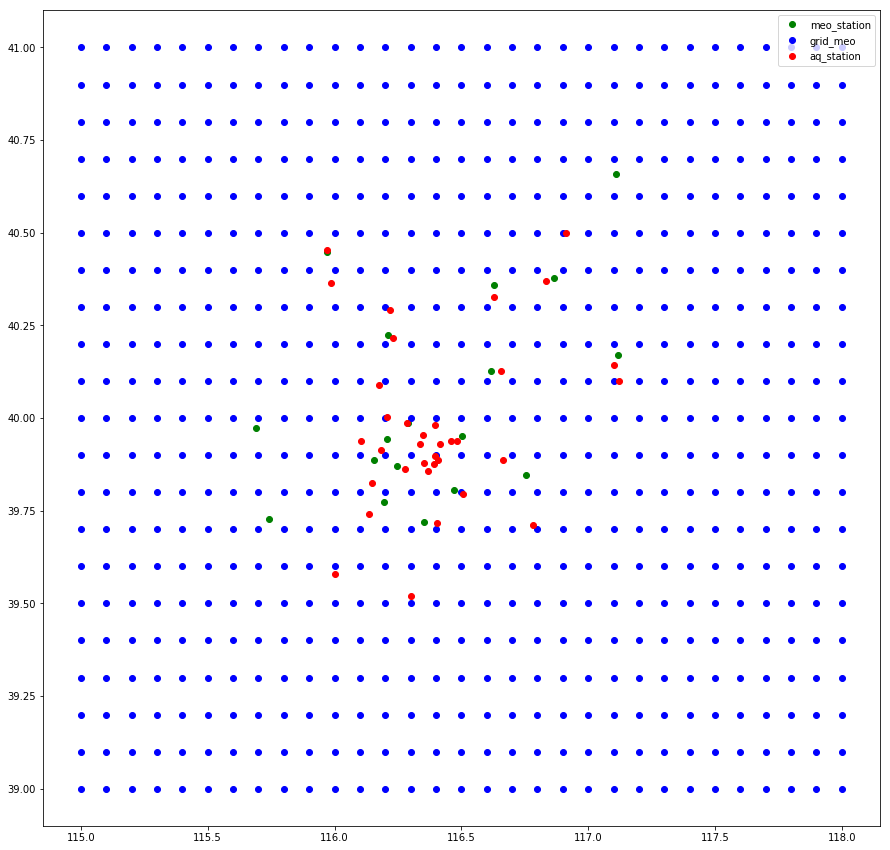

In [5]:
plt.rc("figure", figsize=(15,15));
plt.plot(meo_locations_longitudes, meo_locations_latitudes, "go", label="meo_station");
plt.plot(grid_meo_locations_longitudes, grid_meo_locations_latitudes, "bo", label="grid_meo");
plt.plot(aq_locations_longitudes, aq_locations_latitudes, "ro", label="aq_station");
plt.legend();

- 由于点非常密集，暂时不使用插值的方式，而是直接选用和 aq_station 最近的 meo_station 的天气值作为 aq_station 的天气值
- 同时，由于`观测气象数据`采集的时间短于空气质量数据，因此只使用`网格气象数据`
- 注意，与`观测气象数据`相比，`网格气象数据`没有`weather`属性

### 2. 距离空气质量站点最近的天气站点

In [6]:
aq_station_nearest_meo_station = {}

# 暂时只使用 网格气象数据
# stations = meo_locations + grid_meo_locations
stations = grid_meo_locations

for aq_station in aq_locations:
    nearest_meo_station_name = find_nearst_meo_station_name(aq_station, stations)
    aq_station_nearest_meo_station[aq_station[0]] = nearest_meo_station_name

In [7]:
# 空气质量站点 与 天气站点
aq_station_nearest_meo_station

{'aotizhongxin_aq': 'beijing_grid_304',
 'badaling_aq': 'beijing_grid_224',
 'beibuxinqu_aq': 'beijing_grid_263',
 'daxing_aq': 'beijing_grid_301',
 'dingling_aq': 'beijing_grid_265',
 'donggaocun_aq': 'beijing_grid_452',
 'dongsi_aq': 'beijing_grid_303',
 'dongsihuan_aq': 'beijing_grid_324',
 'fangshan_aq': 'beijing_grid_238',
 'fengtaihuayuan_aq': 'beijing_grid_282',
 'guanyuan_aq': 'beijing_grid_282',
 'gucheng_aq': 'beijing_grid_261',
 'huairou_aq': 'beijing_grid_349',
 'liulihe_aq': 'beijing_grid_216',
 'mentougou_aq': 'beijing_grid_240',
 'miyun_aq': 'beijing_grid_392',
 'miyunshuiku_aq': 'beijing_grid_414',
 'nansanhuan_aq': 'beijing_grid_303',
 'nongzhanguan_aq': 'beijing_grid_324',
 'pingchang_aq': 'beijing_grid_264',
 'pinggu_aq': 'beijing_grid_452',
 'qianmen_aq': 'beijing_grid_303',
 'shunyi_aq': 'beijing_grid_368',
 'tiantan_aq': 'beijing_grid_303',
 'tongzhou_aq': 'beijing_grid_366',
 'wanliu_aq': 'beijing_grid_283',
 'wanshouxigong_aq': 'beijing_grid_303',
 'xizhimenbei_

对于上述字典中的键对应的 aq_station，直接使用对应的 value 作为其天气数据

### Changelog
- 20180425 v0
    - 空气质量站点、气象站点的位置分布
    - 距离空气质量站点最近的天气站点